This Killed or Seriously Injured (KSI) dataset is a subset from all traffic collision events.
The source of the data comes from police reports where an officer attended an event related to
a traffic collision. Please note that this dataset does not include all traffic collision events. The
KSI data only includes events where a person sustained a major or fatal injury in a traffic collision
event. The definitions included in Appendix B relate to the severity of injury used to classify the
events in this dataset. Other injury types including minor or none are associated to every
individual included in the event.
The KSI data includes a record (row) for every person involved in the collision event
regardless of their level of injury, it includes everyone who was involved in a particular collision
event. The field “Index” provides an arbitrary unique identification for every record in the entire
dataset. The “ACCNUM” is a unique identification for each traffic collision event. Since the data
includes every person involved in a collision event, this identification is duplicated. Please note
hat this number is not unique and it may repeat year over year. Careful consideration must be
made when creating a subset for unique events, as the detailed information provided is for
every person involved and its associated role and information may be lost.
For example, the event with ACCNUM=6000607400 has 5 persons involved in the
collision (5 records). The field “INVTYPE” indicates the role of the person in the collision event.
The “INVAGE” indicates the age range of the person and the “INJURY” type indicates the level of
injury they sustained. Therefore, this event can be interpreted in the following way:
1. Passenger 1 age 20 to 24 sustained a fatal injury.
2. Passenger 2 age 15-19 sustained a fatal injury.
3. Passenger 3 age 20 to 24 sustained a major injury
4. Driver age 1 20 to 24 sustained a major injury.
5. Driver 2 age 45 to 49 sustained a major injury.

Synopsis: “IMPACTYPE” indicates this was a rear-end type of collision. “MANOUVER”, “DRIVACT”
and “DRIVCON” indicates Driver 2 stopped, was driving properly and in normal condition.
However, Driver 1 was changing lanes, sped too fast for conditions and had been drinking.
There are thirteen categories related to the type of event. Each record is flagged with a “Yes” if
this collision is considered to fall under this criteria. Definitions for those categories are provided
below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/KSI.csv')

df[df.ACCNUM==6000607400]    #case 6000607400


,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
12816,-8.851369e+06,5.425199e+06,80503019,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12817
12817,-8.851369e+06,5.425199e+06,80503077,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12818
12818,-8.851369e+06,5.425199e+06,80503078,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12819
12819,-8.851369e+06,5.425199e+06,80503079,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12820
12820,-8.851369e+06,5.425199e+06,80503080,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12821
12821,-8.851369e+06,5.425199e+06,80503081,6000607400,2016,2016/04/10 04:00:00+00,326,JANE ST,SHEPPARD AVE W,NaN,...,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),D31,12822


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17488 entries, 0 to 17487
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17488 non-null  float64
 1   Y                  17488 non-null  float64
 2   INDEX_             17488 non-null  int64  
 3   ACCNUM             17488 non-null  int64  
 4   YEAR               17488 non-null  int64  
 5   DATE               17488 non-null  object 
 6   TIME               17488 non-null  int64  
 7   STREET1            17488 non-null  object 
 8   STREET2            15896 non-null  object 
 9   OFFSET             3028 non-null   object 
 10  ROAD_CLASS         17112 non-null  object 
 11  DISTRICT           17453 non-null  object 
 12  WARDNUM            16963 non-null  float64
 13  LATITUDE           17488 non-null  float64
 14  LONGITUDE          17488 non-null  float64
 15  LOCCOORD           17393 non-null  object 
 16  ACCLOC             120

In [4]:
null_value_df = df.isnull().sum().sort_values(ascending=False)

In [5]:
def printUnique(df, columns):
    for column in columns:
        print(f'{column}: {pd.unique(df[column])}')

In [6]:
number_of_unique_values_df = df.nunique().sort_values(ascending=True)
one_unique_value_list = number_of_unique_values_df[number_of_unique_values_df==1].index.to_list()
printUnique(df, one_unique_value_list)

# Values of some columns are either yes or null

TRSN_CITY_VEH: [nan 'Yes']
ALCOHOL: ['Yes' nan]
REDLIGHT: [nan 'Yes']
AG_DRIV: ['Yes' nan]
CYCLIST: [nan 'Yes']
SPEEDING: ['Yes' nan]
PASSENGER: ['Yes' nan]
EMERG_VEH: [nan 'Yes']
DISABILITY: [nan 'Yes']
TRUCK: [nan 'Yes']
PEDESTRIAN: [nan 'Yes']
AUTOMOBILE: ['Yes' nan]
MOTORCYCLE: [nan 'Yes']


In [8]:
number_of_unique_values_df[number_of_unique_values_df>1]

# WARDNUM seems to be city ward id
# WARDNUM                 71
# fatal_no as described in the doc is a Sequential Number
# FATAL_NO                78 
# HOOD seems to be the id of NEIGHBOURHOOD
# HOOD_140               141
# NEIGHBOURHOOD_140      141
# NEIGHBOURHOOD_158      159
# HOOD_158               159


printUnique(df, number_of_unique_values_df[(number_of_unique_values_df>1) & (number_of_unique_values_df<71)].index.to_list())

# ACCLASS                  3

# fix DISTRICT missing values manually
# DISTRICT                 4 
print(null_value_df.DISTRICT)

# too many empty value in INITDIR
# INITDIR                  5
print(null_value_df.INITDIR)

# INJURY                   5
print(null_value_df.INJURY)

# fill null LOCCOORD with mean/median
# LOCCOORD                 7
print(null_value_df.LOCCOORD)

# fill null VISIBILITY with mean/median
# VISIBILITY               8
print(null_value_df.VISIBILITY)

# No null value
# LIGHT                    9
print(null_value_df.LIGHT)


# fill null RDSFCOND with mean/median
# RDSFCOND                 9
print(null_value_df.RDSFCOND)

# too many empty value in ACCLOC
# ACCLOC                   9
print(null_value_df.ACCLOC)

# PEDCOND                 10
print(null_value_df.PEDCOND)

# DRIVCOND                10
print(null_value_df.DRIVCOND)

# 376 null values, 
# ROAD_CLASS              10
print(null_value_df.ROAD_CLASS)

# CYCCOND                 10
print(null_value_df.CYCCOND)

# IMPACTYPE               10

# TRAFFCTL                10

# CYCACT                  11

# DRIVACT                 13
# PEDACT                  15
# YEAR                    16
# MANOEUVER               16
# PEDTYPE                 16
# DIVISION                17
# INVTYPE                 19
# INVAGE                  21
# CYCLISTYPE              22

ACCLASS: ['Non-Fatal Injury' 'Fatal' 'Property Damage Only' nan]
DISTRICT: ['Toronto and East York' 'Etobicoke York' 'Scarborough' 'North York' nan]
INITDIR: [nan 'North' 'South' 'East' 'West' 'Unknown']
INJURY: ['Major' 'Minor' nan 'None' 'Minimal' 'Fatal']
LOCCOORD: ['Intersection' 'Mid-Block' 'Exit Ramp Westbound' 'Exit Ramp Southbound'
 nan 'Mid-Block (Abnormal)' 'Entrance Ramp Westbound'
 'Park, Private Property, Public Lane']
VISIBILITY: ['Clear' 'Rain' 'Other' 'Snow' 'Strong wind' 'Freezing Rain'
 'Fog, Mist, Smoke, Dust' 'Drifting Snow' nan]
LIGHT: ['Dark' 'Dusk' 'Daylight' 'Dark, artificial' 'Dawn' 'Dusk, artificial'
 'Dawn, artificial' 'Daylight, artificial' 'Other']
RDSFCOND: ['Wet' 'Dry' 'Other' 'Slush' 'Ice' 'Loose Snow' 'Packed Snow'
 'Spilled liquid' 'Loose Sand or Gravel' nan]
ACCLOC: ['Intersection Related' nan 'At Intersection' 'Non Intersection'
 'At/Near Private Drive' 'Overpass or Bridge' 'Underpass or Tunnel'
 'Private Driveway' 'Trail' 'Laneway']
PEDCOND: [nan 'U

In [72]:
df_num_people = df.ACCNUM.value_counts()
df['num_people'] = df.ACCNUM.map(df_num_people)


<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

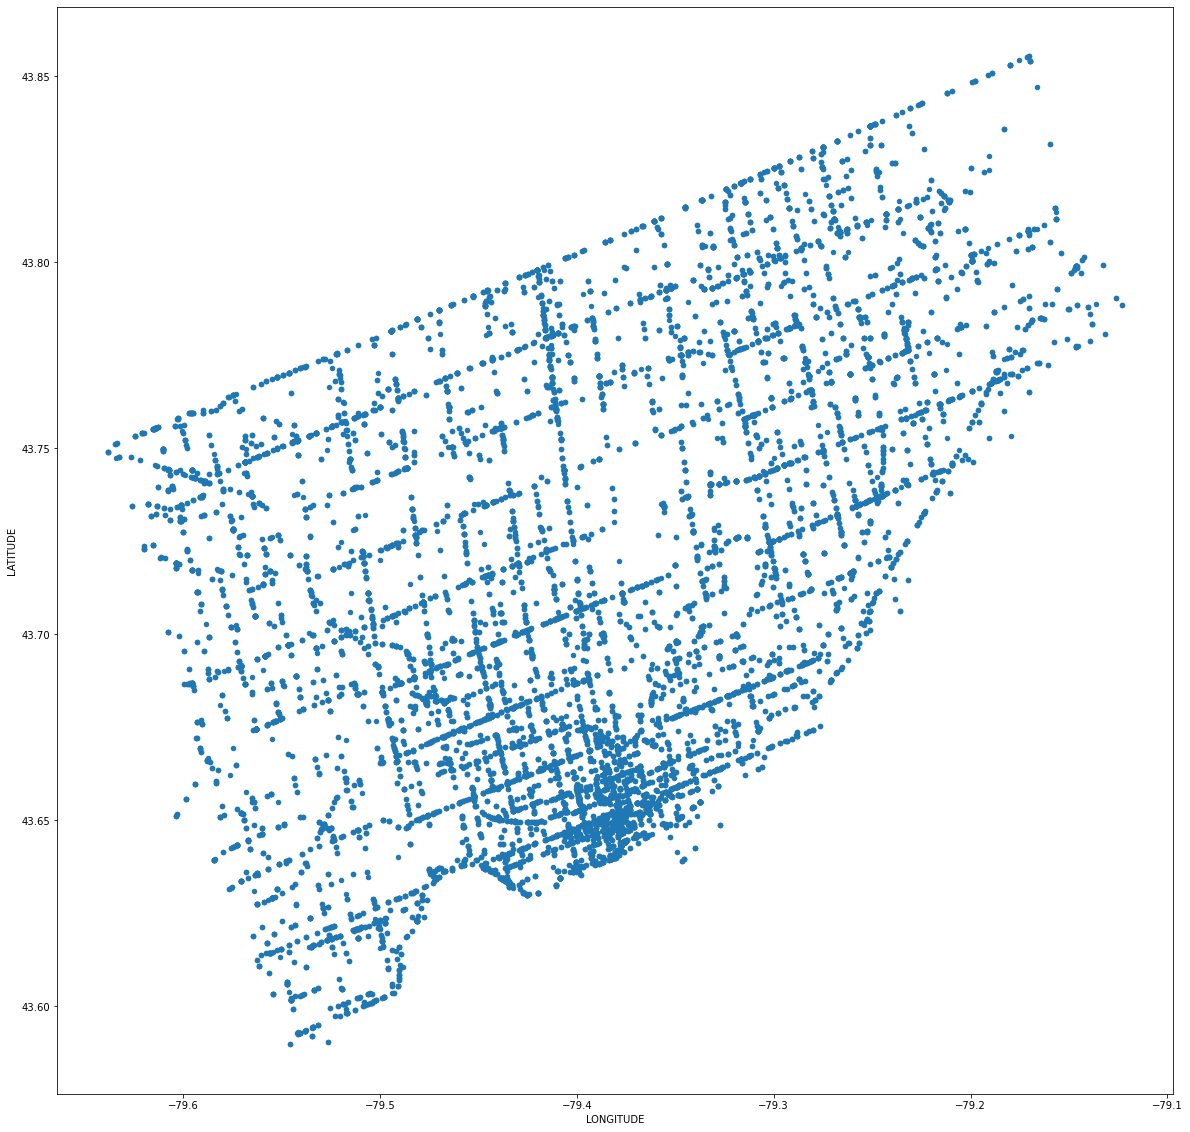

In [73]:
df.plot(kind='scatter',x='LONGITUDE',y='LATITUDE', figsize=(20,20))